In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn import datasets
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

**Question 1:**

In [2]:
#Function to implement the (batch) gradient descent algorithm for multiple linear regression 
def gradient_descent(X, Y, T, a):
    # n is the number of features
    m, n = X.shape
    # theta is the array of thetas for each parameter
    theta = np.zeros(n)
    # f is the loss
    f = np.zeros(T)
    for i in range(T):
        xtdot = X.dot(theta)
        # loss for current theta
        f[i] = 0.5 * (np.linalg.norm(xtdot - Y)**2)
        # steepest ascent at f(theta)
        g = np.transpose(X).dot(xtdot - Y)
        # change the thetas to perform a step
        theta = theta - (a * g)
    return theta, f

**Question 2:**

$
Given:\\
θ_{new} = θ_{old} - \alpha * \frac{d}{d\theta}L(\theta) \\
L = \frac{-1}{m}\sum_{i=1}^{m}[y_i*ln(h_\theta(x_i)) + (1-y_i)*ln(1-h_\theta(x_i))]\\
ln(\frac{h_\theta(x_i)}{1-h_\theta(x_i)}) = \theta_0 + \theta_1*x_{i1} + \theta_2*x_{i2} + ... + \theta_j*x_{ij}\\
h_\theta(x_i) = \frac{1}{1+e^{-(\theta_0 + \theta_1*x_{i1} + \theta_2*x_{i2} + ... + \theta_j*x_{ij})}}\\
--------------------------\\
$Multiplying the $(1-y_i)$,$
L = \frac{-1}{m}\sum_{i=1}^{m}[y_i*ln(h_\theta(x_i)) - y_i*ln(1-h_\theta(x_i)) + ln(1-h_\theta(x_i))]\\
$Using: $ lg(m) - lg(n) = lg(\frac{m}{n})$, $
L = \frac{-1}{m}\sum_{i=1}^{m}[y_i*ln(\frac{h_\theta(x_i)}{1-h_\theta(x_i)}) + ln(1-h_\theta(x_i))]\\
$Substituting in $ln(\frac{h_\theta(x_i)}{1-h_\theta(x_i)}) = \theta_0 + \theta_1*x_{i1} + \theta_2*x_{i2} + ... + \theta_n*x_{in}$, $
L = \frac{-1}{m}\sum_{i=1}^{m}[y_i*(\theta_0 + \theta_1*x_{i1} + \theta_2*x_{i2} + ... + \theta_n*x_{in}) + ln(1-h_\theta(x_i))]\\
$Setting $ z_i = \theta_0 + \theta_1*x_{i1} + \theta_2*x_{i2} + ... + \theta_n*x_{in} $, $\\
h_\theta(x_i) = \frac{1}{1+e^{-z_i}}\\
1 - h_\theta(x_i) = 1 - \frac{1}{1+e^{-z_i}}\\
1 - h_\theta(x_i) = \frac{e^{-z_i}}{1+e^{-z_i}}\\
$Multiplying by $ \frac{e^{z_i}}{e^{z_i}} $,$\\
1 - h_\theta(x_i) = \frac{1}{1+e^{z_i}}\\
$Substituting back into L,$\\
L = \frac{-1}{m}\sum_{i=1}^{m}[y_i*(z_i) + ln(\frac{1}{1+e^{z_i}})]\\
$Taking the derivative of L,$\\
\frac{dL}{d\theta} = \frac{-1}{m}\sum_{i=1}^{m}[y_i\frac{d}{d\theta_j}(\theta_0 + \theta_1*x_{i1} + \theta_2*x_{i2} + ... \theta_j*x_{ij} + ... + \theta_n*x_{in}) \\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  - \frac{d}{d\theta_j}(ln(1+e^{(\theta_0 + \theta_1*x_{i1} + \theta_2*x_{i2} + ... \theta_j*x_{ij} + ... + \theta_n*x_{in})}))]\\
\frac{dL}{d\theta} = \frac{-1}{m}\sum_{i=1}^{m}[y_i*x_{ij} - \frac{e^{z_i}}{1+e^{z_i}}*x_{ij}]\\
$Substitute in $ h_\theta(x_i) = \frac{e^{z_i}}{1+e^{z_i}} $, $
\frac{dL}{d\theta} = \frac{-1}{m}\sum_{i=1}^{m}[y_i*x_{ij} - h_\theta(x_i)*x_{ij}]\\
\frac{dL}{d\theta} = \frac{-1}{m}\sum_{i=1}^{m}[(y_i - h_\theta(x_i))x_{ij}]\\
\frac{dL}{d\theta} = \frac{1}{m}\sum_{i=1}^{m}[(h_\theta(x_i) - y_i)x_{ij}]\\
$Substituting into $θ_{new} = θ_{old} - \alpha * \frac{d}{d\theta}L(\theta)$ gives the final equation of, $
θ_{new} = θ_{old} - \alpha * \frac{1}{m}\sum_{i=1}^{m}[(h_\theta(x_i) - y_i)x_{ij}]\\
$

**Question 3:**

In [3]:
#Function to implement the batch gradient descent algorithm for multiple linear regression,
#but utilizing the logistic regression update equation

def gradient_descent_LR(X, Y, T, a):
    # n is the number of features
    m, n = X.shape
    # theta is the array of thetas for each parameter
    theta = np.zeros(n)
    # f is the loss
    f = np.zeros(T)
    for i in range(T):
        # calculate the sigmoid function values
        h_x = 1/(1+np.exp(-np.dot(X, theta)))
        # calculate the summation part of the loss
        loss_sum = 0
        for j in range(m):
            loss_sum = loss_sum + (Y[j]*np.log(h_x[j]) + (1-Y[j])*np.log(1-h_x[j]))
        # loss for current theta
        f[i] = (-1/m)*loss_sum
        # steepest ascent at f(theta)
        g = np.transpose(X).dot(h_x - Y)
        # change the thetas to perform a step
        theta = theta - a * g
    return theta, f

**Problem 4:**

In [4]:
# Given Code for data simulation:
# Simulate data for linear regression
gen_data_x, gen_data_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)

# Simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

# Testing on own implementation:
tlin, flin = gradient_descent(gen_data_x, gen_data_y, 100, 0.001)
tlog, flog = gradient_descent_LR(log_gen_data_x, log_gen_data_y, 100, 0.01)

# Testing on sklearn gradient descent:
slin = SGDRegressor(max_iter=150)
slin.fit(gen_data_x, gen_data_y)
slog = LogisticRegression().fit(log_gen_data_x, log_gen_data_y);

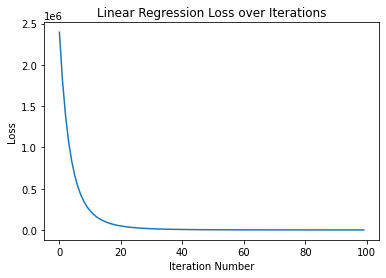

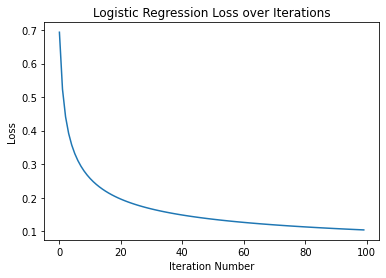

In [5]:
# Graphing:
# Show that the loss decreases in both over the iterations:
plt.plot(range(flin.size),flin);
plt.title("Linear Regression Loss over Iterations");
plt.xlabel("Iteration Number");
plt.ylabel("Loss");
plt.show();
plt.plot(range(flog.size),flog);
plt.title("Logistic Regression Loss over Iterations");
plt.xlabel("Iteration Number");
plt.ylabel("Loss");

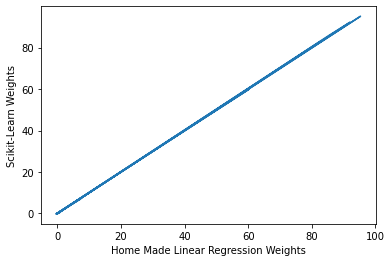

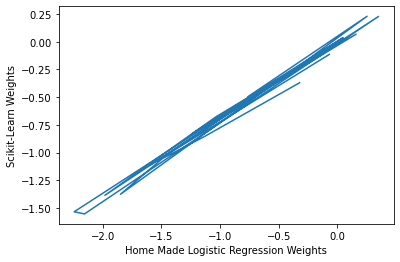

In [6]:
# Compare the weights found with those found by the Scikit implementation
plt.show();
plt.plot(tlin, slin.coef_);
plt.xlabel("Home Made Linear Regression Weights");
plt.ylabel("Scikit-Learn Weights");
plt.show()
plt.plot(tlog, slog.coef_[0]);
plt.xlabel("Home Made Logistic Regression Weights");
plt.ylabel("Scikit-Learn Weights");

**Try it Out!**\
The goal of this portion will be using Scikit's built in Diabetes dataset, can a model be built to help predict wether an individual will have an above average blood sugar / blood glucose level. This is an important statistic for Diabetics because hyperglycemia and hypoglycemia (high and low blood sugar) can have immediate and long term negative health effects.\
Age, Sex, Body Mass Index, Average Blood Pressure, and five blood serum measurements will all be used to predict wether an individual's Blood Glucose is above or below the average.

In [7]:
# Load Scikit's Diabetes Dataset:
data = pd.DataFrame(sklearn.datasets.load_diabetes()['data'], columns = ['Age', 'Sex', 'BMI', 'BP', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'Blood_Glucose'])

# Grabs all non-Blood_Glucose columns as the X set
X = data[['Age', 'Sex', 'BMI', 'BP', 'tc', 'ldl', 'hdl', 'tch', 'ltg']]
# Simplifies the Blood Glucose values to 1 for above the average, 0 for below the average
bg = data['Blood_Glucose'].apply(lambda x : 1 if x >= 0 else 0)

# Splits up the data for training (75%) and testing (25%)
X_train, X_test, bg_train, bg_test = train_test_split(X, bg, test_size = 0.25)

In [8]:
# The first algorithm to be utilized will be Linear SVM
# The kernel type is determined via a grid search
tuned_parameters = [{'kernel': ['rbf']}, 
                    {'kernel': ['linear']},
                    {'kernel': ['poly'],
                     'degree': range(2,6)},
                    {'kernel': ['sigmoid']}]
clf = GridSearchCV(SVC(), tuned_parameters, cv=10)
# The freshly defined svm is trained on the training data
clf.fit(X_train, bg_train);

In [9]:
# The second algorithm to be used is K Nearest Neighbors
# The number of k neighbors visited is determined via a grid search
tuned_parameters = [{'n_neighbors' : range(1,150)}]
knnr = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=10)
knnr.fit(X_train, bg_train);

In [10]:
# Next a 10-fold cross-validation is performed on both algorithms
tenfold = KFold(n_splits=10, shuffle=True)
knnr_scores = cross_validate(knnr, X, bg, cv=tenfold)
clf_scores = cross_validate(clf, X, bg, cv=tenfold)

# Prints the mean of each algorithm's scores
print("Average K Nearest Neighbors Score", (np.mean(knnr_scores['test_score'])))
print("Average Linear SVM Score", (np.mean(clf_scores['test_score'])))
# Prints the standard deviation of each algorithm's scores
print("Standard Deviation of K Nearest Neighbors' Scores", (np.std(knnr_scores['test_score'])))
print("Standard Deviation of Linear SVM's Scores", (np.std(clf_scores['test_score'])))

Average K Nearest Neighbors Score 0.6513636363636364
Average Linear SVM Score 0.6831818181818182
Standard Deviation of K Nearest Neighbors' Scores 0.07930066551722209
Standard Deviation of Linear SVM's Scores 0.06769600585901919


In the end, the Linear SVM algorithm proved more effective at predicting based on its higher average cross-validation score. The standard deviations are close, and it varies which is lower each time the model is trained. However, it is worth noting that both metrics were close, indicating both models perform similarly well in predicting wether an individual has high or low blood sugar.